

<h1 align="center"><font size="5">Example - Supervised Machine Learning: Regression</font></h1>


Using dataset from Kaggle, here I'm comparing different regression models using pipeline.

## Importing required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

## Importing the Dataset


In [2]:
data = pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# 1. About the Data


I found the data on Kaggle website and here's the link: https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

This dataset includes various information like GRE score, TOEFL score, university rating, SOP, LOR, CGPA, research and chance of admit. In this dataset, 400 entries are included.


#### Details about the data:

*   GRE Scores ( out of 340 )
*   TOEFL Scores ( out of 120 )
*   University Rating ( out of 5 )
*   Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
*   Undergraduate GPA ( out of 10 )
*   Research Experience ( either 0 or 1 )
*   Chance of Admit ( ranging from 0 to 1 )

# 2. Objectives


My main objective will be analyzing the data and predicting the chance of admission of the student in particular university using a regression model.

# 3. Data Preparation

First I'm going to explore the data and clean it if necessary. Then, I will perform feature selection and engineering.

In [3]:
#to see what types of data is present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
#Rename the column names: Removing the space between the characters
data.rename(columns={"Serial No.": "SNo", "GRE Score": "GRE", "TOEFL Score": "TOEFL", "University Rating": "Uni-Rate", "Chance of Admit ": "Chance"}, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SNo       400 non-null    int64  
 1   GRE       400 non-null    int64  
 2   TOEFL     400 non-null    int64  
 3   Uni-Rate  400 non-null    int64  
 4   SOP       400 non-null    float64
 5   LOR       400 non-null    float64
 6   CGPA      400 non-null    float64
 7   Research  400 non-null    int64  
 8   Chance    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


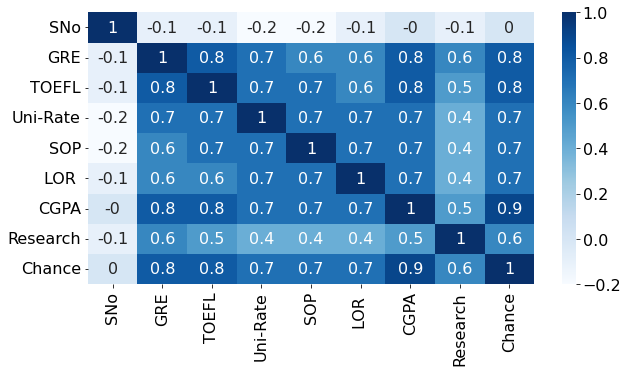

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(np.round(data.corr(),1),annot=True, cmap="Blues")
plt.show()

In [7]:
data.corr()['Chance'].sort_values(ascending = False)

Chance      1.000000
CGPA        0.873289
GRE         0.802610
TOEFL       0.791594
Uni-Rate    0.711250
SOP         0.675732
LOR         0.669889
Research    0.553202
SNo         0.042336
Name: Chance, dtype: float64

* The strongest correlation is between **Chance** and **CGPA** features
* Since' there is none string value, I don't need to use any encoder. So, I'll continue with data preparation.

### <font color=black>**Determining Normality**</font>

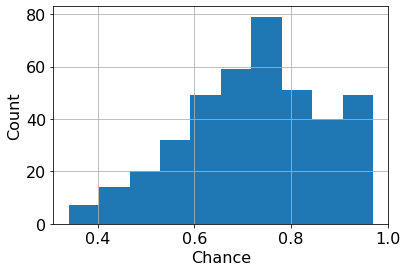

In [8]:
data.Chance.hist()
plt.xlabel('Chance')
plt.ylabel('Count');

In [9]:
normaltest(data.Chance.values)

NormaltestResult(statistic=11.709217968951164, pvalue=0.0028666562891090314)

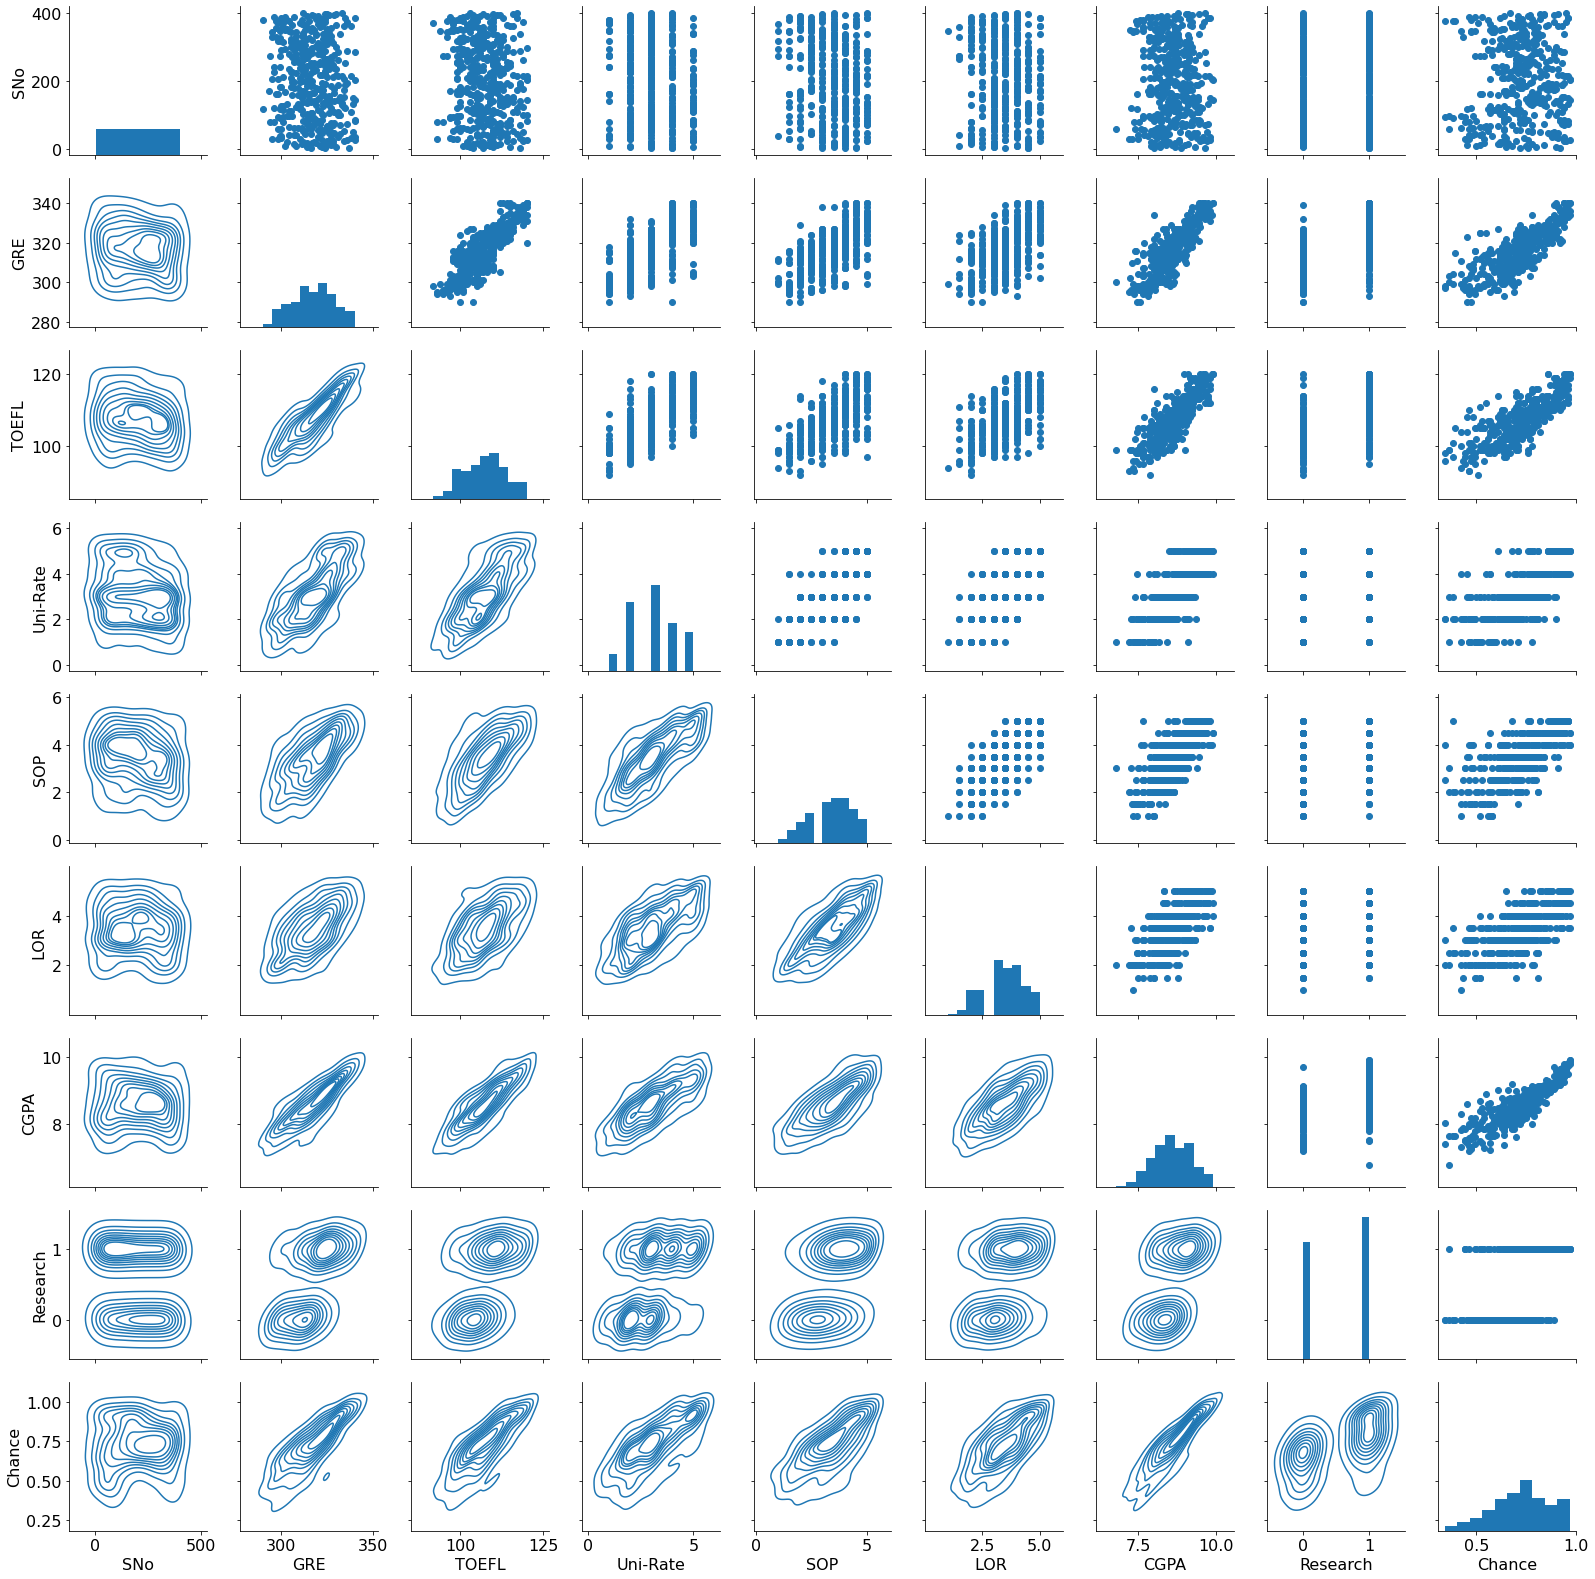

In [10]:
#Pair Plot for all data
plot = sns.PairGrid(data)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

In [11]:
#Cross Validation Data Splitting
X = data.drop('Chance', axis=1)
y = data.Chance

#5-fold splitting:
kf = KFold(shuffle=True, random_state=92018, n_splits=5)

for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 0  1  4  6  8  9 11 12 13 14] 320
Test index: [ 2  3  5  7 10 16 19 32 33 41] 80

Train index: [0 1 2 3 4 5 6 7 8 9] 320
Test index: [14 25 27 30 31 35 38 39 42 44] 80

Train index: [ 0  1  2  3  5  6  7  8  9 10] 320
Test index: [ 4 11 13 18 22 28 45 49 50 55] 80

Train index: [0 1 2 3 4 5 6 7 8 9] 320
Test index: [15 17 20 23 24 29 36 40 54 56] 80

Train index: [ 2  3  4  5  7 10 11 13 14 15] 320
Test index: [ 0  1  6  8  9 12 21 26 34 37] 80



#### Visualizing Kfold Splitted Data

In [12]:
def plot_cv_splitteddata(cv, X, y, ax, n_splits, lw):
    """This function creates a visualization for kfold splitted data"""
    
    # Assign 1 to traning data index and 0 to test data index:
    for ii, (tr, tt) in enumerate(cv.split(X)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap='tab10',
            vmin=0,
            vmax=10,
        )
        
        yticklabels = list(range(1,n_splits+1))
       
        ax.set(
        yticks=np.arange(n_splits),
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits-0.5, -0.5],
        xlim=[0, len(X)],
       )

    return ax

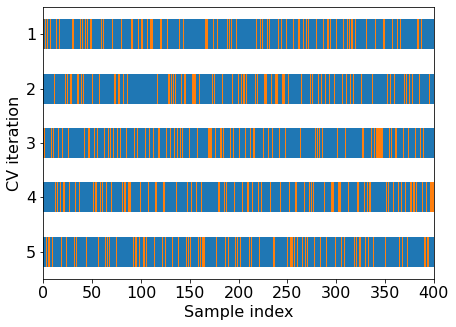

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
plot_cv_splitteddata(kf, X, y, ax, 5, 30);

# 4. Linear Regression Models


Next, I'm creating a pipeline for both `StandardScaler` and `LinearRegression`. I'm using `PolynomialFeatures` function to generate new features.

In [14]:
s = StandardScaler()
lr = LinearRegression()
ls = Lasso()
rg = Ridge()

estimator_1 = Pipeline([("scaler", s),("regression", lr)])
estimator_2 = Pipeline([("scaler", s),("regression", ls)])
estimator_3 = Pipeline([("scaler", s),("regression", rg)])


prediction_1 = cross_val_predict(estimator_1, X, y, cv=kf)
prediction_2 = cross_val_predict(estimator_2, X, y, cv=kf)
prediction_3 = cross_val_predict(estimator_3, X, y, cv=kf)


print('Linear Regression: ',r2_score(y, prediction_1))
print('Lasso: ',r2_score(y, prediction_2))
print('Ridge: ',r2_score(y, prediction_3))

Linear Regression:  0.8062087157424215
Lasso:  -0.0026335069949576795
Ridge:  0.8063457156815346


In [15]:
pf = PolynomialFeatures(degree=2)

scores = []
alphas = np.geomspace(0.0006, 100.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

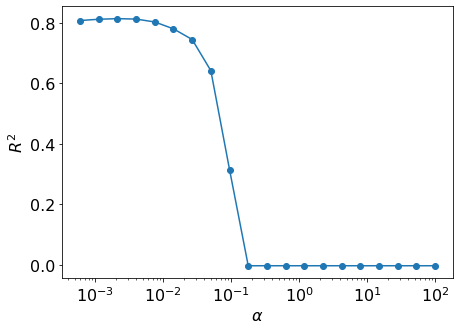

In [16]:
plt.figure(figsize=(7,5))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [17]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.0006))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.8446515050099677

In [18]:
predictions_2 = cross_val_predict(best_estimator, X, y, cv = kf)

In [19]:
print('The mean absolute error:', metrics.mean_absolute_error(y, predictions_2))
print('The mean squared error:', metrics.mean_squared_error(y, predictions_2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y, predictions_2)))

The mean absolute error: 0.0458769722900203
The mean squared error: 0.0039021250069474853
The root mean squared error: 0.06246699133900628


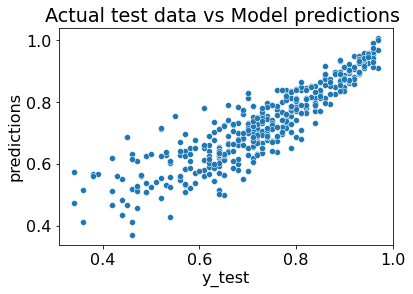

In [20]:
sns.scatterplot(x=y, y=predictions_2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show();